# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o

# Plan

1. read csv file with titanic data
2. explore 
3. some plotting
4. missing values



In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/titanic.csv')
df.shape

(891, 12)

In [3]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# Select rows, columns


In [32]:
# rows 9 to 12
print(df[8:11])

# rows 9 to 12 but onlye the Name and Fare 
df[8:11][['Name','Fare']]

# Noteice the diiference in out put when you print or just display the last value of the cell

    PassengerId  Survived  Pclass                                 Name  \
9            10         1       2  Nasser, Mrs. Nicholas (Adele Achem)   
10           11         1       3      Sandstrom, Miss. Marguerite Rut   
11           12         1       1             Bonnell, Miss. Elizabeth   

       Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
9   female  14.0      1      0   237736  30.0708   NaN        C  
10  female   4.0      1      1  PP 9549  16.7000    G6        S  
11  female  58.0      0      0   113783  26.5500  C103        S  


,Name,Fare
9,"Nasser, Mrs. Nicholas (Adele Achem)",30.0708
10,"Sandstrom, Miss. Marguerite Rut",16.7000
11,"Bonnell, Miss. Elizabeth",26.5500


In [33]:
# A statistical overview of the numerical values in the dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [35]:
# Columns

print("-- Columns of the dataframe: \n %s"% df.columns)
# First rows of the 'Name' column
print("\n-- First rows of the 'Name' column: \n %s"% df.Name.head())
# df.Name is equivalent to df['Name'] when displaying
# When assigning new values use df['Name']


# First rows of the 'PassengerId' and 'Survived' columns. Notice the double brackets [[   ]]

print("\n-- First rows of the 'PassengerId' and 'Survived' columns:\n %s"% df[ ['PassengerId', 'Survived'] ].head() )

-- Columns of the dataframe: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

-- First rows of the 'Name' column: 
 0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

-- First rows of the 'PassengerId' and 'Survived' columns:
    PassengerId  Survived
0            1         0
1            2         1
2            3         1
3            4         1
4            5         0


In [36]:
# Create a boolean condition corresponding to Passengers who survived

cond = (df.Survived == 1)

# cond is a series of True and False with the same index as the dataframe
# df[cond] will select all the rows for which cond is True

print("so we have %s rows of people who survived"% str(df[cond].shape[0]) ) 
# The opposite of cond is ~cond (tilde sign)
print("and %s rows of people who did not survived"% str(df[~cond].shape[0])) 



so we have 290 rows of people who survived
and 424 rows of people who did not survived


In [37]:
# reload the data
df = pd.read_csv('../data/titanic.csv')

# We count have counted the number of missing values with df.Age.isnull()
print("We have %d missing ages and %d values"% (df[df.Age.isnull()].shape[0], df[df.Age.notnull()].shape[0]) )

# We can remove them with .dropna
df.dropna(subset = ['Age'], inplace=True )

print("After dropping the missing values, we now have %d missing ages and %d values"% (df[df.Age.isnull()].shape[0], df[df.Age.notnull()].shape[0]) )


We have 177 missing ages and 714 values
After dropping the missing values, we now have 0 missing ages and 714 values


In [38]:
# We now want to replace the missing Age values with the mean of the Age

# 0. reload the data
df = pd.read_csv('../data/titanic.csv')

# 1. calculate mean of age
# The condition is df.Age.notnull() 

age_average = df[ df.Age.notnull()  ]['Age'].mean()
print("Average age %0.2f"% age_average)
# 2. replace null values with average age 
# The condition is df.Age.isnull() 


df.loc[ df.Age.isnull(),'Age'] = age_average

# 3. No more missing values
print("how many missing values for Age?: %d"% df[df.Age.isnull()].shape[0] )


Average age 29.70
how many missing values for Age?: 0


In [41]:
# Save the data to a csv file
df.to_csv('../data/titanic_with_age.csv')


# Plotting with matplotlib
 



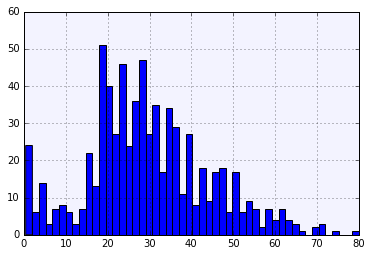

In [42]:
# let's reload the original dataset and remove all the missing Age values
df = pd.read_csv('../data/titanic.csv')
# Histogram of fares
# Scatterplot of Age vs Fare
import matplotlib.pyplot as plt
# Next line useful to display graph in jupyter notebook. When in the console use just %matplotlib
%matplotlib inline

# Histogram of Age, specify the number of bins


df.Age.hist(bins = 50)

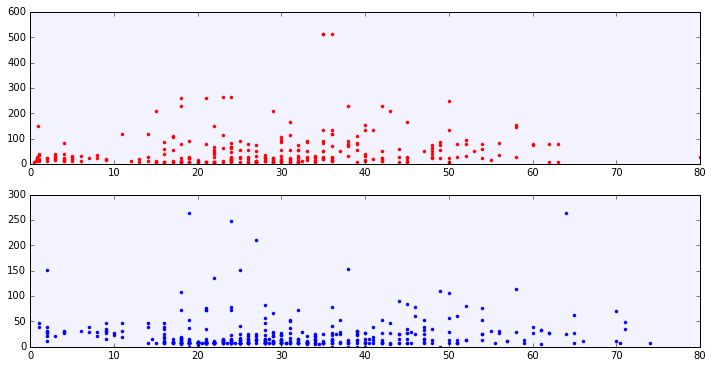

In [51]:
# Scatter plot of Age vs Fare 

cond = (df.Survived==1)

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))


ax1.plot(df[cond].Age, df[cond].Fare, '.' ,color ='red', label ='Survived')
ax2.plot(df[~cond].Age, df[~cond].Fare, '.' ,color ='blue', label ='Survived')



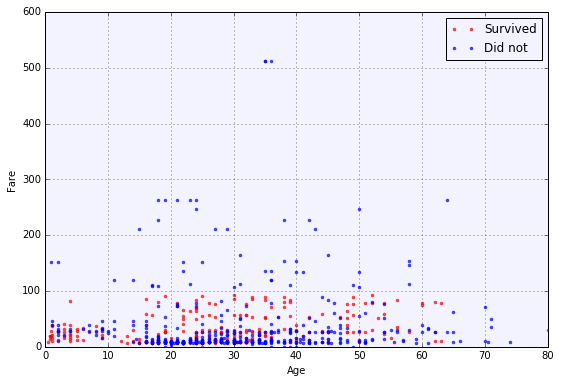

In [54]:
# removing the outlier for Fare
cond = (df.Survived == 1) & (df.Fare < 100) 

fig = plt.figure(figsize=(9,6))
plt.plot( df[cond].Age, df[cond].Fare,'.'  , color='r', alpha = 0.7, label ='Survived')
plt.plot( df[~cond].Age, df[~cond].Fare,'.'  , color='b', alpha = 0.7, label ='Did not')
plt.legend(loc='best')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()
plt.show()

# paying a higher fare did not save anyone


# More visualization examples

http://pandas.pydata.org/pandas-docs/stable/visualization.html